In [18]:
import pandas as pd
import numpy as np
import quandl
import datetime
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = 'Ufux_HxUXZKAgFjxWhGi'

In [19]:
data13 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_13.csv")
data14 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_14.csv")
data15 = pd.read_csv("/Users/guapofish/Desktop/Global AI/SDG_Myfirstproject/equity/sdgtone_15.csv")
data = pd.concat([data13,data14,data15], axis=0) 

In [20]:
data15.head()

,Unnamed: 0,date,code,SDG,tone
0,0,20150101,--,1. No Poverty,-1.304348
1,1,20150101,--,10. Reduced Inequalities,-3.102656
2,2,20150101,--,11. Sustainable Cities and Communities,-2.319714
3,3,20150101,--,12. Responsible Consumption and Production,-2.276572
4,4,20150101,--,13. Climate Action,-0.474060


In [8]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [9]:
df_sum_tone = data.groupby(['date', 'code'])['tone'].agg(['sum']).reset_index() 
df_sum_tone['date'] = pd.to_datetime(df_sum_tone['date'].astype(str), format='%Y%m%d')
df_sum_tone.rename(columns={'code':'ticker'}, inplace=True)


In [10]:
ticker_list = df_sum_tone['ticker'].values
ticker_list = list(set(ticker_list))
adj_close13 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2012-12-31', 'lte': '2013-12-31' },
                             paginate=True)


In [11]:
adj_close14 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2013-12-31', 'lte': '2014-12-31' },
                             paginate=True)
adj_close15 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'date', 'adj_close'] },
                             date = { 'gte': '2014-12-31', 'lte': '2015-12-31' },
                             paginate=True)


In [12]:
adj_close = pd.concat([adj_close15, adj_close14, adj_close13], axis=0)
adj_close = adj_close.sort_values(['ticker', 'date'], ascending=[True, False])

In [13]:
adj_close["return"] = adj_close.groupby("ticker")['adj_close'].apply(lambda x: (x - x.shift(-1))/x.shift(-1))   
df = df_sum_tone.merge(adj_close, how = 'inner', on = ['date', 'ticker'])



In [14]:
N = 10 
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return  = return_list.to_frame()
df_return['total_return_10_top_stock'] = (df_return['return'] + 1).cumprod() - 1

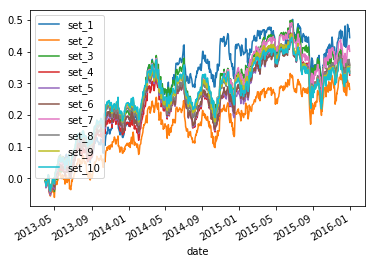

In [15]:
num_of_stock_in_set = 15; 
rank_max = 150;
range_ = rank_max + num_of_stock_in_set; 
graph_num = int((range_-num_of_stock_in_set)/num_of_stock_in_set); 
set_array = [0]*graph_num;
for i in range (num_of_stock_in_set,range_,num_of_stock_in_set):
    N = int(i/num_of_stock_in_set);
    set_array[N-1]='set_'+str(N) 
    df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x:
            x.nlargest(i, columns = ['sum'])).reset_index() 
    df_grouped.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: 
            x.nsmallest(num_of_stock_in_set, columns = ['sum'])).reset_index() 
    return_list = df_grouped.groupby('date')['return'].mean() 
    df_return['return_'] = return_list.to_frame()['return'] 
    df_return['set_'+str(N)] = (df_return['return_'] + 1).cumprod() - 1 
df_return.plot(y=set_array) 
plt.show()

In [16]:
N = 5
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_5']  = return_list.to_frame()['return']
df_return['total_return_5_top_stock'] = (df_return['return_5'] + 1).cumprod() - 1

N = 8
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_8']  = return_list.to_frame()['return']
df_return['total_return_8_top_stock'] = (df_return['return_8'] + 1).cumprod() - 1

N = 10
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_10']  = return_list.to_frame()['return']
df_return['total_return_10_top_stock'] = (df_return['return_10'] + 1).cumprod() - 1

N = 50 
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_50']  = return_list.to_frame()['return']
df_return['total_return_50_top_stock'] = (df_return['return_50'] + 1).cumprod() - 1

N = 100
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_100']  = return_list.to_frame()['return']
df_return['total_return_100_top_stock'] = (df_return['return_100'] + 1).cumprod() - 1

N = 500
df_grouped = df.groupby('date')[['ticker', 'sum', 'return']].apply(lambda x: x.nlargest(N, 
                       columns = ['sum'])).reset_index()
return_list = df_grouped.groupby('date')['return'].mean()
df_return['return_500']  = return_list.to_frame()['return']
df_return['total_return_500_top_stock'] = (df_return['return_500'] + 1).cumprod() - 1

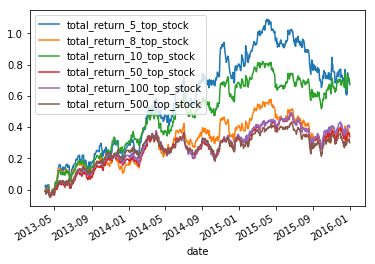

In [17]:
df_return.plot(y=["total_return_5_top_stock","total_return_8_top_stock","total_return_10_top_stock", "total_return_50_top_stock",
                  "total_return_100_top_stock", "total_return_500_top_stock"])
plt.show()

In [13]:
ticker_list = df_sum_tone['ticker'].values
second_list=list(set(ticker_list))



In [14]:
yf.pdr_override()
start = datetime.datetime(2012,12,31)
end = datetime.datetime(2015,12,31)
stocks = second_list
f = pdr.get_data_yahoo(stocks, start = start, end = end)


[*********************100%***********************]  7813 of 7813 downloaded


In [16]:
f

Open                                                         \
                  2330      3283        3377          A         AA       AABA   
Date                                                                            
2012-12-31         NaN       NaN         NaN  28.390558  20.473560  19.430000   
2013-01-02         NaN       NaN         NaN  30.164520  21.338640  20.200001   
2013-01-03         NaN       NaN         NaN  30.000000  21.554911  20.049999   
2013-01-04  152.000000       NaN  196.000000  30.143061  21.891331  19.760000   
2013-01-07  152.000000       NaN  205.300003  30.472103  22.299841  19.559999   
2013-01-08  155.000000       NaN  204.600006  30.379112  22.011480  19.320000   
2013-01-09   22.916700       NaN  204.899994  30.758226  22.419991  19.730000   
2013-01-10  164.000000       NaN  204.000000  31.216022  21.915359  19.190001   
2013-01-11  167.699997       NaN  206.899994  31.230330  21.675060  19.049999   
2013-01-14         NaN       NaN         NaN  31.065809  21.578939  19.330000   
2013-01-15   23.166700       NaN  207.000000  30.865522  21.314610  19.280001   
2013-01-16   23.083300       NaN  204.500000  30.865522  21.338640  19.910000   
2013-01-17  164.000000       NaN  202.800003  31.216022  21.434759  20.139999   
2013-01-18  164.000000       NaN  202.500000  31.509298  21.554911  20.070000   
2013-01-21  166.100006       NaN  202.699997        NaN        NaN        NaN   
2013-01-22   22.666700       NaN  207.199997  31.444921  21.699089  19.910000   
2013-01-23   22.666700       NaN  208.500000  31.859800  22.155661  19.980000   
2013-01-24  167.199997       NaN  208.399994  31.874105  21.987450  20.080000   
2013-01-25  167.000000       NaN  212.300003  31.995708  21.795210  20.430000   
2013-01-28   22.583300       NaN  215.000000  32.324749  21.795210  20.500000   
2013-01-29  188.800003       NaN  218.000000  32.160229  21.482821  20.870001   
2013-01-30  182.500000       NaN  217.100006  31.888412  21.410730  19.920000   
2013-01-31  183.800003       NaN  216.500000  31.723892  21.098339  19.920000   
2013-02-01  182.399994       NaN  218.899994  32.246067  21.362671  19.770000   
2013-02-04   22.750000       NaN  217.500000  32.045780  21.434759  19.760000   
2013-02-05  178.300003       NaN  217.199997  31.874105  21.338640  19.490000   
2013-02-06   22.750000       NaN  217.500000  31.988556  21.314610  19.629999   
2013-02-07  177.000000       NaN  219.000000  32.117310  21.482821  20.100000   
2013-02-08  176.500000       NaN  217.000000  32.238914  21.434759  20.379999   
2013-02-11         NaN       NaN         NaN  32.310444  21.386700  20.440001   
...                ...       ...         ...        ...        ...        ...   
2015-11-20  188.000000  218000.0  294.000000  38.779999  21.170429  32.860001   
2015-11-23         NaN       NaN         NaN  39.290001  21.747150  33.000000   
2015-11-24  185.000000  219300.0  293.000000  39.810001  21.795210  33.090000   
2015-11-25   38.666698  217000.0  299.000000  40.590000  21.747150  32.770000   
2015-11-26  187.000000  209500.0  280.000000        NaN        NaN        NaN   
2015-11-27  189.000000  208200.0  282.000000  41.320000  22.395960  32.790001   
2015-11-30   39.083302  214000.0  281.000000  41.970001  22.419991  33.029999   
2015-12-01   38.333302  214500.0  279.000000  42.160000  22.732380  33.869999   
2015-12-02   38.333302  215900.0  278.000000  41.070000  22.636259  35.000000   
2015-12-03   38.416698  214900.0  276.000000  40.639999  22.492081  35.590000   
2015-12-04  176.000000  214000.0  275.000000  40.230000  21.699089  34.340000   
2015-12-07   39.250000  217900.0  272.000000  40.919998  22.732380  34.759998   
2015-12-08   38.333302  217900.0  273.000000  40.610001  21.170429  34.240002   
2015-12-09   37.500000  217700.0  270.000000  41.250000  20.737890  35.799999   
2015-12-10   37.750000  219500.0  271.000000  40.959999  21.122370  34.490002   
2015-12-11  170.000000  218600.0  270.000000  40.

In [18]:
adjust_table=f['Adj Close']
table = adjust_table.pct_change()
table.dropna(inplace = True)


,2330,3283,3377,A,AA,AABA,AAL,AAMC,AAN,AAOI,...,ZIOP,ZIV,ZIXI,ZMLP,ZN,ZNGA,ZNH,ZSAN,ZTR,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-30,0.006289,0.008772,0.003731,-0.004486,-0.016782,-0.019683,-0.016092,-0.097222,-0.015284,-0.013304,...,0.018007,-0.015251,-0.013333,-0.004172,0.000000,0.015152,-0.005732,-0.062762,0.005800,0.0
2015-12-31,0.000000,0.000000,0.000000,-0.005825,-0.009036,-0.003296,-0.010514,-0.022222,-0.007095,-0.035955,...,-0.020047,-0.015726,-0.019305,0.040694,0.027624,0.000000,-0.000262,0.017857,0.003295,0.0


In [1]:
df_sum_tone

NameError: name 'df_sum_tone' is not defined

In [97]:
set_array = [0]*10
for i in range (20,220,20):
    N = int(i/10);
    set_array[N-1]='set_'+str(N)
set_array

IndexError: list assignment index out of range